<a href="https://colab.research.google.com/github/SoneyBun/wyatt/blob/main/wyatt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Note from Sunny: The labels are sqft, bedrooms, bathrooms, year built, lot size, and garages.

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [25]:
virginia = pd.read_csv("Virginia_Housing.csv")
ames = pd.read_csv("AmesHousing.csv")

In [26]:
print("Virginia Housing Columns:\n", virginia.columns.tolist(), "\n")
print("Ames Housing Columns:\n", ames.columns.tolist(), "\n")

Virginia Housing Columns:
 ['Square_Feet', 'Bedrooms', 'Bathrooms', 'Year_Built', 'Lot_Size', 'Garage', 'Price'] 

Ames Housing Columns:
 ['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu

In [27]:
virginia.columns = virginia.columns.str.strip()
ames.columns = ames.columns.str.strip()

In [28]:
virginia = virginia.loc[:, ~virginia.columns.duplicated()].copy()
ames = ames.loc[:, ~ames.columns.duplicated()].copy()
virginia = virginia.reset_index(drop=True)
ames = ames.reset_index(drop=True)

In [29]:
rename_map = {}
for col in ames.columns:
    c = col.lower()
    if "grliv" in c or "sqft" in c or "area" in c:
        rename_map[col] = "Square_Feet"
    elif "bed" in c:
        rename_map[col] = "Bedrooms"
    elif "bath" in c:
        rename_map[col] = "Bathrooms"
    elif "year" in c:
        rename_map[col] = "Year_Built"
    elif "lot" in c:
        rename_map[col] = "Lot_Size"
    elif "garage" in c:
        rename_map[col] = "Garage"
    elif "price" in c or "sale" in c:
        rename_map[col] = "Price"

ames_renamed = ames.rename(columns=rename_map)

In [30]:
target_cols = ["Square_Feet", "Bedrooms", "Bathrooms", "Year_Built", "Lot_Size", "Garage", "Price"]

In [31]:
ames_filtered = ames_renamed[[c for c in target_cols if c in ames_renamed.columns]].copy()
virginia_filtered = virginia[[c for c in target_cols if c in virginia.columns]].copy()

In [33]:
ames_filtered = ames_filtered.loc[:, ~ames_filtered.columns.duplicated()]
virginia_filtered = virginia_filtered.loc[:, ~virginia_filtered.columns.duplicated()]

ames_filtered = ames_filtered.reset_index(drop=True)
virginia_filtered = virginia_filtered.reset_index(drop=True)

In [34]:
all_cols = sorted(set(ames_filtered.columns).union(set(virginia_filtered.columns)))
ames_filtered = ames_filtered.reindex(columns=all_cols)
virginia_filtered = virginia_filtered.reindex(columns=all_cols)

In [35]:
combined_df = pd.concat([virginia_filtered, ames_filtered], ignore_index=True, axis=0)
combined_df = combined_df.loc[:, ~combined_df.columns.duplicated()]

In [42]:
combined_df = pd.concat([virginia_filtered, ames_filtered], ignore_index=True)
combined_df = combined_df.loc[:, ~combined_df.columns.duplicated()].copy()

In [43]:
for col in ["Square_Feet", "Bedrooms", "Bathrooms", "Year_Built", "Lot_Size", "Garage", "Price"]:
    if col in combined_df.columns:
        combined_df[col] = pd.to_numeric(combined_df[col], errors="coerce")

In [44]:
combined_df = combined_df.dropna(subset=["Square_Feet", "Bedrooms", "Bathrooms", "Year_Built", "Lot_Size", "Garage", "Price"])

In [45]:
X = combined_df[["Square_Feet", "Bedrooms", "Bathrooms", "Year_Built", "Lot_Size", "Garage"]]
y = combined_df["Price"]

In [48]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [49]:
y_pred = model.predict(X_test)

In [50]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [51]:
print(f"\nModel Performance:")
print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:,.2f}")


Model Performance:
R² Score: 0.972
RMSE: 38,237.87


In [52]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nSample Predictions:")
print(comparison.head(10))


Sample Predictions:
       Actual      Predicted
95   247994.0  287976.463228
15   978822.0  997493.689232
30   378355.0  350756.126856
158  858076.0  856733.972889
128  667170.0  661852.918140
115  404540.0  399804.121618
69   843559.0  921304.043781
170  401945.0  449435.058314
174  396682.0  418840.435243
45   979562.0  967360.264619


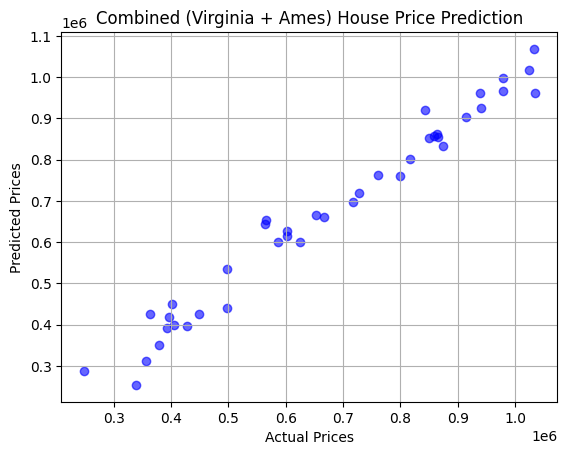

In [53]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Combined (Virginia + Ames) House Price Prediction")
plt.grid(True)
plt.show()

In [54]:
sample = pd.DataFrame({
    "Square_Feet": [700],
    "Bedrooms": [8],
    "Bathrooms": [4],
    "Year_Built": [2025],
    "Lot_Size": [0.49],
    "Garage": [8]
})

predicted_price = model.predict(sample)
print(f"\nPredicted Price for Sample House: ${predicted_price[0]:,.2f}")